<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/Logistic%20regression%20with%20a%20bank%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


In [194]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [195]:
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [196]:
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [197]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [198]:
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [199]:
train_df.shape

(750000, 18)

In [200]:
numerical_features = train_df.select_dtypes(include=np.number)
categorical_features = train_df.select_dtypes(exclude=np.number)

In [201]:
numerical_features.drop('id', axis=1, inplace=True)

In [202]:
numerical_features

,age,balance,day,duration,campaign,pdays,previous,y
0,42,7,25,117,3,-1,0,0
1,38,514,18,185,1,-1,0,0
2,36,602,14,111,2,-1,0,0
3,27,34,28,10,2,-1,0,0
4,26,889,3,902,1,-1,0,1
...,...,...,...,...,...,...,...,...
749995,29,1282,4,1006,2,-1,0,1
749996,69,631,19,87,1,-1,0,0
749997,50,217,17,113,1,-1,0,0
749998,32,-274,26,108,6,-1,0,0


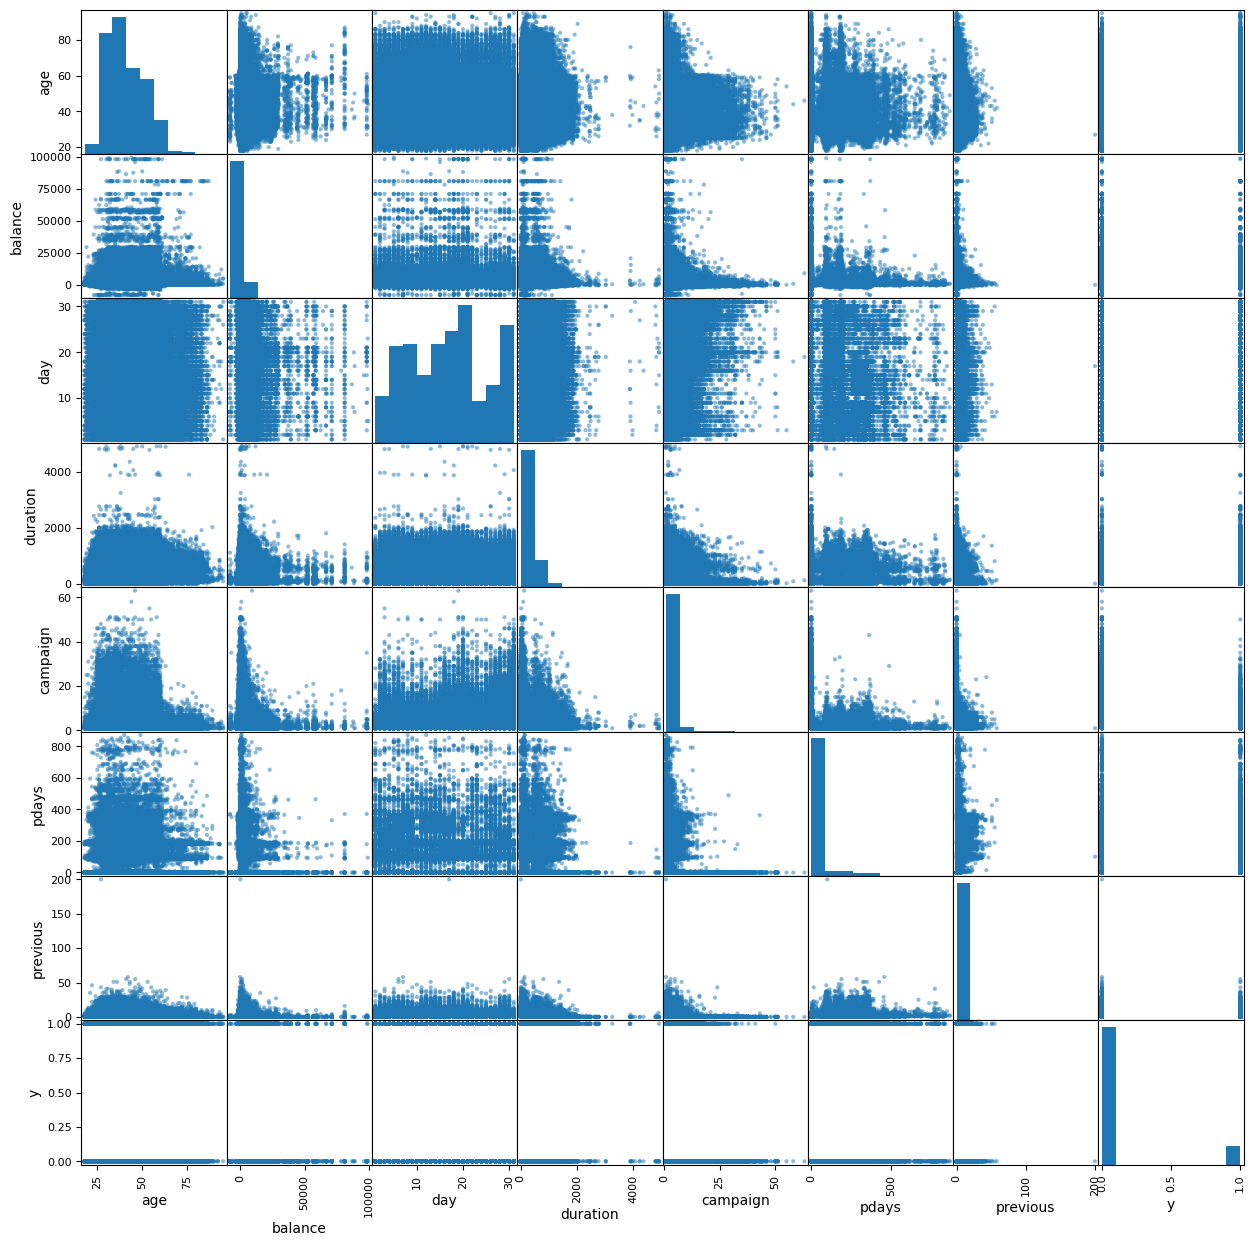

In [203]:
pd.plotting.scatter_matrix(numerical_features, figsize=(15,15))
plt.show()

In [204]:
numerical_features.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.062838,-0.015179,-0.004388,0.002052,-0.021635,0.004541,0.009523
balance,0.062838,1.000000,-0.008269,0.109629,-0.027744,0.010040,0.033897,0.122513
day,-0.015179,-0.008269,1.000000,-0.056755,0.178806,-0.086197,-0.051082,-0.049625
duration,-0.004388,0.109629,-0.056755,1.000000,-0.083016,0.047555,0.040105,0.519283
campaign,0.002052,-0.027744,0.178806,-0.083016,1.000000,-0.061465,-0.026707,-0.075829
pdays,-0.021635,0.010040,-0.086197,0.047555,-0.061465,1.000000,0.561839,0.089277
previous,0.004541,0.033897,-0.051082,0.040105,-0.026707,0.561839,1.000000,0.119552
y,0.009523,0.122513,-0.049625,0.519283,-0.075829,0.089277,0.119552,1.000000


In [205]:
#scaler
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_features.drop('y', axis=1))

numerical_df = pd.DataFrame(numerical_scaled, columns =scaler.get_feature_names_out(numerical_features.columns.drop('y')))

In [206]:
numerical_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.106310,-0.422083,1.076594,-0.510829,0.155597,-0.302803,-0.223475
1,-0.289776,-0.243316,0.228194,-0.261338,-0.580100,-0.302803,-0.223475
2,-0.487819,-0.212287,-0.256606,-0.532843,-0.212251,-0.302803,-0.223475
3,-1.379012,-0.412563,1.440194,-0.903409,-0.212251,-0.302803,-0.223475
4,-1.478033,-0.111092,-1.589805,2.369319,-0.580100,-0.302803,-0.223475


In [207]:
#categorical features

categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,technician,married,secondary,no,no,no,cellular,aug,unknown
1,blue-collar,married,secondary,no,no,no,unknown,jun,unknown
2,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
3,student,single,secondary,no,yes,no,unknown,may,unknown
4,technician,married,secondary,no,yes,no,cellular,feb,unknown


In [208]:
categorical_features['job'].unique()

array(['technician', 'blue-collar', 'student', 'admin.', 'management',
       'entrepreneur', 'self-employed', 'unknown', 'services', 'retired',
       'housemaid', 'unemployed'], dtype=object)

In [209]:
categorical_features['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [254]:
Ct = ColumnTransformer([('encoder', OrdinalEncoder(), ['housing', 'loan']),
                         ('ordinalencoder', OneHotEncoder(sparse_output=False), ['job', 'marital', 'default', 'contact', 'month', 'poutcome'])])

transformed_set = Ct.fit_transform(categorical_features)

categorical_features_df = pd.DataFrame(transformed_set, columns=Ct.get_feature_names_out(categorical_features.columns))
categorical_features_df.head()

,encoder__housing,encoder__loan,ordinalencoder__job_admin.,ordinalencoder__job_blue-collar,ordinalencoder__job_entrepreneur,ordinalencoder__job_housemaid,ordinalencoder__job_management,ordinalencoder__job_retired,ordinalencoder__job_self-employed,ordinalencoder__job_services,...,ordinalencoder__month_jun,ordinalencoder__month_mar,ordinalencoder__month_may,ordinalencoder__month_nov,ordinalencoder__month_oct,ordinalencoder__month_sep,ordinalencoder__poutcome_failure,ordinalencoder__poutcome_other,ordinalencoder__poutcome_success,ordinalencoder__poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [255]:
categorical_features_df.isnull().sum()

,0
encoder__housing,0
encoder__loan,0
ordinalencoder__job_admin.,0
ordinalencoder__job_blue-collar,0
ordinalencoder__job_entrepreneur,0
ordinalencoder__job_housemaid,0
ordinalencoder__job_management,0
ordinalencoder__job_retired,0
ordinalencoder__job_self-employed,0
ordinalencoder__job_services,0


In [257]:
categorical_scaled = scaler.fit_transform(categorical_features_df)

categorical_df = pd.DataFrame(categorical_scaled, columns =scaler.get_feature_names_out(categorical_features_df.columns))

In [258]:
categorical_df.head()

,encoder__housing,encoder__loan,ordinalencoder__job_admin.,ordinalencoder__job_blue-collar,ordinalencoder__job_entrepreneur,ordinalencoder__job_housemaid,ordinalencoder__job_management,ordinalencoder__job_retired,ordinalencoder__job_self-employed,ordinalencoder__job_services,...,ordinalencoder__month_jun,ordinalencoder__month_mar,ordinalencoder__month_may,ordinalencoder__month_nov,ordinalencoder__month_oct,ordinalencoder__month_sep,ordinalencoder__poutcome_failure,ordinalencoder__poutcome_other,ordinalencoder__poutcome_success,ordinalencoder__poutcome_unknown
0,-1.101939,-0.403422,-0.349144,-0.542416,-0.155549,-0.147227,-0.552789,-0.221862,-0.161307,-0.305986,...,-0.377780,-0.088297,-0.661751,-0.31079,-0.111465,-0.099886,-0.252989,-0.141608,-0.155428,0.339595
1,-1.101939,-0.403422,-0.349144,1.843605,-0.155549,-0.147227,-0.552789,-0.221862,-0.161307,-0.305986,...,2.647042,-0.088297,-0.661751,-0.31079,-0.111465,-0.099886,-0.252989,-0.141608,-0.155428,0.339595
2,0.907491,-0.403422,-0.349144,1.843605,-0.155549,-0.147227,-0.552789,-0.221862,-0.161307,-0.305986,...,-0.377780,-0.088297,1.511143,-0.31079,-0.111465,-0.099886,-0.252989,-0.141608,-0.155428,0.339595
3,0.907491,-0.403422,-0.349144,-0.542416,-0.155549,-0.147227,-0.552789,-0.221862,-0.161307,-0.305986,...,-0.377780,-0.088297,1.511143,-0.31079,-0.111465,-0.099886,-0.252989,-0.141608,-0.155428,0.339595
4,0.907491,-0.403422,-0.349144,-0.542416,-0.155549,-0.147227,-0.552789,-0.221862,-0.161307,-0.305986,...,-0.377780,-0.088297,-0.661751,-0.31079,-0.111465,-0.099886,-0.252989,-0.141608,-0.155428,0.339595


In [259]:
train_full = pd.concat([numerical_df, categorical_df], axis=1)
train_full.fillna(0, inplace=True)

In [260]:
X_train = train_full
y_train  = train_df['y']
y_train.fillna(0, inplace=True)

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [262]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600000, 45), (150000, 45), (600000,), (150000,))

In [263]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [264]:
model_logistic.score(X_test, y_test)

0.9162733333333334

In [265]:
#cross validation

cross_val_predict(model_logistic, X_train, y_train, cv=5)

array([1, 0, 0, ..., 0, 0, 0])

In [266]:
probabilities = model_logistic.predict_proba(X_test)[:,1]


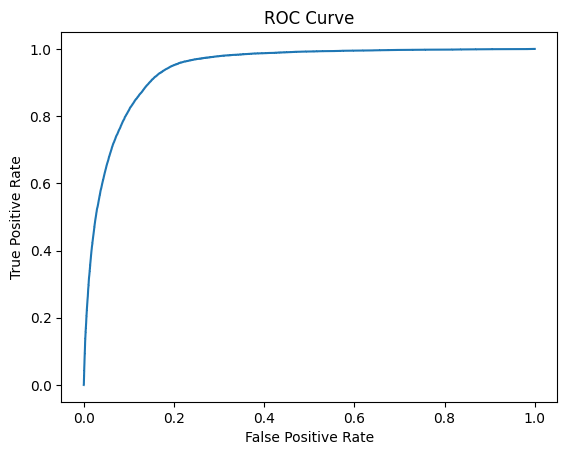

In [267]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [223]:
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [224]:
len(test_df['id'])

250000

In [225]:
index = test_df['id']

In [226]:
test_df.drop('id', axis=1, inplace=True)

In [227]:
test_cat = test_df.select_dtypes(exclude=np.number)
test_num = test_df.select_dtypes(include=np.number)

test_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [268]:
# Use the ColumnTransformer fitted on the training data to transform the test categorical features
test_cat_transformed = Ct.transform(test_cat)

# Convert to DataFrame with appropriate column names
test_cat_df = pd.DataFrame(test_cat_transformed, columns=Ct.get_feature_names_out(test_cat.columns))

test_cat_df.head()

,encoder__housing,encoder__loan,ordinalencoder__job_admin.,ordinalencoder__job_blue-collar,ordinalencoder__job_entrepreneur,ordinalencoder__job_housemaid,ordinalencoder__job_management,ordinalencoder__job_retired,ordinalencoder__job_self-employed,ordinalencoder__job_services,...,ordinalencoder__month_jun,ordinalencoder__month_mar,ordinalencoder__month_may,ordinalencoder__month_nov,ordinalencoder__month_oct,ordinalencoder__month_sep,ordinalencoder__poutcome_failure,ordinalencoder__poutcome_other,ordinalencoder__poutcome_success,ordinalencoder__poutcome_unknown
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [270]:
scaler.fit(test_cat_df)
test_cat_scaled = scaler.transform(test_cat_df)

In [271]:
test_cat_scaled_df = pd.DataFrame(test_cat_scaled, columns=scaler.get_feature_names_out(test_cat_df.columns))

In [272]:
test_cat_scaled_df.head()

,encoder__housing,encoder__loan,ordinalencoder__job_admin.,ordinalencoder__job_blue-collar,ordinalencoder__job_entrepreneur,ordinalencoder__job_housemaid,ordinalencoder__job_management,ordinalencoder__job_retired,ordinalencoder__job_self-employed,ordinalencoder__job_services,...,ordinalencoder__month_jun,ordinalencoder__month_mar,ordinalencoder__month_may,ordinalencoder__month_nov,ordinalencoder__month_oct,ordinalencoder__month_sep,ordinalencoder__poutcome_failure,ordinalencoder__poutcome_other,ordinalencoder__poutcome_success,ordinalencoder__poutcome_unknown
0,0.911617,-0.403761,-0.348025,1.840727,-0.156209,-0.146388,-0.553544,-0.220695,-0.162400,-0.305274,...,-0.377584,-0.088526,1.512972,-0.310917,-0.113036,-0.099052,-0.251245,-0.14341,-0.156853,0.339851
1,0.911617,-0.403761,-0.348025,-0.543264,-0.156209,-0.146388,1.806542,-0.220695,-0.162400,-0.305274,...,-0.377584,-0.088526,-0.660951,-0.310917,-0.113036,-0.099052,-0.251245,-0.14341,-0.156853,0.339851
2,0.911617,2.476710,-0.348025,-0.543264,-0.156209,-0.146388,-0.553544,-0.220695,6.157643,-0.305274,...,-0.377584,-0.088526,1.512972,-0.310917,-0.113036,-0.099052,-0.251245,-0.14341,-0.156853,0.339851
3,0.911617,2.476710,-0.348025,1.840727,-0.156209,-0.146388,-0.553544,-0.220695,-0.162400,-0.305274,...,-0.377584,-0.088526,1.512972,-0.310917,-0.113036,-0.099052,-0.251245,-0.14341,-0.156853,0.339851
4,0.911617,-0.403761,-0.348025,-0.543264,-0.156209,-0.146388,-0.553544,-0.220695,-0.162400,-0.305274,...,-0.377584,-0.088526,-0.660951,-0.310917,-0.113036,-0.099052,-0.251245,-0.14341,-0.156853,0.339851


In [274]:
test_num_scaled = scaler.fit_transform(test_num)

test_num_df = pd.DataFrame(test_num_scaled, columns=scaler.get_feature_names_out(test_num.columns) )

test_num_df.head()

,age,balance,day,duration,campaign,pdays,previous
0,-0.886004,0.072797,0.591383,-0.115482,-0.580719,-0.302669,-0.219366
1,0.304284,-0.428386,-1.588192,1.218324,-0.211668,-0.302669,-0.219366
2,-0.489241,-0.419996,-0.377317,-0.531836,-0.211668,-0.302669,-0.219366
3,1.692954,-0.940147,1.560083,-0.480252,-0.580719,-0.302669,-0.219366
4,-1.282767,0.274510,0.712470,-0.273918,-0.580719,-0.302669,-0.219366


In [275]:
# Concatenate the processed numerical and categorical test features
test_full = pd.concat([test_num_df, test_cat_df], axis=1)
test_full.fillna(0, inplace=True) # Handle potential NaNs if any are introduced during transformation

In [276]:
test_full.head()

,age,balance,day,duration,campaign,pdays,previous,encoder__housing,encoder__loan,ordinalencoder__job_admin.,...,ordinalencoder__month_jun,ordinalencoder__month_mar,ordinalencoder__month_may,ordinalencoder__month_nov,ordinalencoder__month_oct,ordinalencoder__month_sep,ordinalencoder__poutcome_failure,ordinalencoder__poutcome_other,ordinalencoder__poutcome_success,ordinalencoder__poutcome_unknown
0,-0.886004,0.072797,0.591383,-0.115482,-0.580719,-0.302669,-0.219366,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.304284,-0.428386,-1.588192,1.218324,-0.211668,-0.302669,-0.219366,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.489241,-0.419996,-0.377317,-0.531836,-0.211668,-0.302669,-0.219366,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.692954,-0.940147,1.560083,-0.480252,-0.580719,-0.302669,-0.219366,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.282767,0.274510,0.712470,-0.273918,-0.580719,-0.302669,-0.219366,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [300]:
y_pred_final = model_logistic.predict(test_full)

In [301]:
submission_df = pd.DataFrame({'id': index, 'y':y_pred_final})

In [302]:
submission_df.head(10)

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0
5,750005,0
6,750006,1
7,750007,0
8,750008,0
9,750009,0


In [308]:
submission_df.to_csv('submission.csv', index=False)